# Creating your own dataset from Google Images
<img src="https://imgur.com/wniZTh0.jpg" width=300>

*by: Francisco Ingham and Jeremy Howard. Inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In this tutorial we will see how to easily create an image dataset through Google Images. **Note**: You will have to repeat these steps for any new category you want to Google (e.g once for dogs and once for cats).

In [2]:

!curl https://course.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   322  100   322    0     0   1540      0 --:--:-- --:--:-- --:--:--  1540
Updating fastai...
Done.


In [0]:
from fastai.vision import *

## Get a list of URLs

### Search and scroll

Go to [Google Images](http://images.google.com) and search for the images you are interested in. The more specific you are in your Google Search, the better the results and the less manual pruning you will have to do.

Scroll down until you've seen all the images you want to download, or until you see a button that says 'Show more results'. All the images you scrolled past are now available to download. To get more, click on the button, and continue scrolling. The maximum number of images Google Images shows is 700.

It is a good idea to put things you want to exclude into the search query, for instance if you are searching for the Eurasian wolf, "canis lupus lupus", it might be a good idea to exclude other variants:

    "canis lupus lupus" -dog -arctos -familiaris -baileyi -occidentalis

You can also limit your results to show only photos by clicking on Tools and selecting Photos from the Type dropdown.

### Download into file

Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

In Google Chrome press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>j</kbd> on Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>j</kbd> on macOS, and a small window the javascript 'Console' will appear. In Firefox press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>k</kbd> on Windows/Linux or <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>k</kbd> on macOS. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. Before running the following commands, you may want to disable ad blocking extensions (uBlock, AdBlockPlus etc.) in Chrome. Otherwise the window.open() command doesn't work. Then you can run the following commands:

```javascript
urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

### Create directory and upload urls file into your server

Choose an appropriate name for your labeled images. You can run these steps multiple times to create different labels.

In [0]:
folder = 'shouko'
file = 'urls_shouko.csv'

You will need to run this cell once per each category.

In [0]:
path = Path('data/happy_sugar_life')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
!cp "/content/drive/My Drive/ProjectN.7z" "/content/data/happy_sugar_life"

In [12]:

!p7zip -d /content/data/happy_sugar_life/ProjectN.7z


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/data/happy_sugar_life/                                         1 file, 900855182 bytes (860 MiB)

Extracting archive: /content/data/happy_sugar_life/ProjectN.7z
--
Path = /content/data/happy_sugar_life/ProjectN.7z
Type = 7z
Physical Size = 900855182
Headers Size = 9063
Method = LZMA2:24
Solid = +
Blocks = 1

  0%      0% 13 - ProjectN/half-N/half (102).png                                          1% 24 - ProjectN/half-N/half (108).jpg                                          2% 29 - ProjectN

In [0]:
!mv /content/ProjectN /content/data/happy_sugar_life

In [0]:
!cp "/content/drive/My Drive/all_series.zip" "/content/data/happy_sugar_life"

## Download images

Now,let's load🔃 the images and assign some classes.


In [0]:
classes = ['N','half-N','non-N']

Then we can remove any images that can't be opened:

In [15]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

N


half-N


non-N


## View data

In [0]:
# np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=350, num_workers=4).normalize(imagenet_stats)
# try not to use imagenet_stats for normalize

In [17]:
imagenet_stats

([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

In [0]:
data.train_ds??

In [0]:
# If you already cleaned your data, run this cell instead of the one before
# np.random.seed(42)
# data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
#         ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Good! Let's take a look at some of our pictures then.

In [77]:
data.classes

['N', 'half-N', 'non-N']

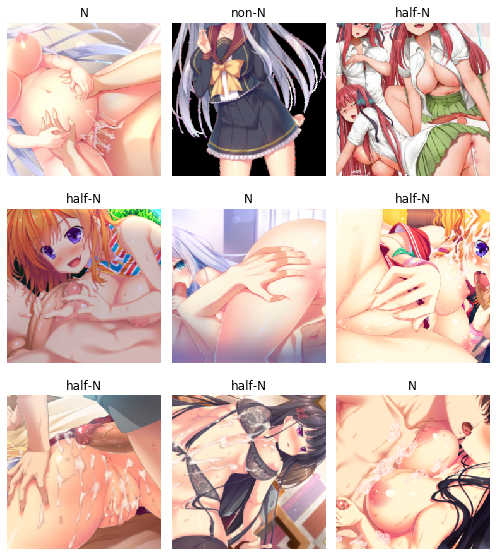

In [78]:
data.show_batch(rows=3, figsize=(7,8))

In [20]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['N', 'half-N', 'non-N'], 3, 724, 180)

## Train model

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)


In [0]:
model_is = learn.model

In [0]:
model_is

In [0]:
model_L = model_is[8]
model_L

In [31]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.552476,0.567733,0.188889,00:13
1,1.122349,0.646704,0.172222,00:12
2,0.906102,0.645164,0.188889,00:12
3,0.760337,0.671706,0.200000,00:12


In [0]:
learn.save('stage-1')

In [55]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (724 items)
x: ImageList
Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244)
y: CategoryList
N,N,N,N,N
Path: data/happy_sugar_life;

Valid: LabelList (180 items)
x: ImageList
Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244)
y: CategoryList
non-N,half-N,half-N,half-N,N
Path: data/happy_sugar_life;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runni

After some quick training, let's do some fine tuning.

In [0]:
learn.unfreeze()

In [57]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


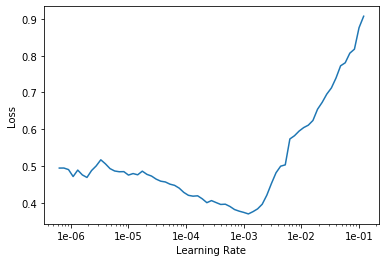

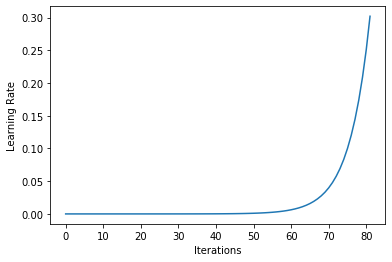

In [58]:
# If the plot is not showing try to give a start and end learning rate
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()
learn.recorder.plot_lr()

In [59]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,1e-4))
# learn.fit_one_cycle(2, max_lr=slice(1e-4/2,1e-3/2))

epoch,train_loss,valid_loss,error_rate,time
0,0.479898,0.678220,0.161111,00:12
1,0.401469,0.469010,0.127778,00:12


In [0]:

# learn.lr_find(start_lr=1e-7, end_lr=2e-3)
# learn.recorder.plot()
# learn.recorder.plot_lr()
learn.save('stage-2', return_path= True)
!cp "data/happy_sugar_life/models/stage-2.pth" "/content/drive/My Drive/Happy Sugar Life/nude-trained-2"

## Interpretation

In [0]:
learn.load('stage-2');

In [62]:
interp = ClassificationInterpretation.from_learner(learn)

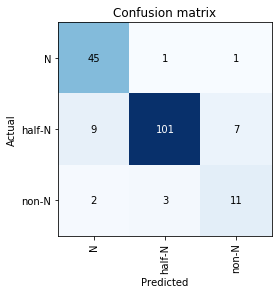

In [63]:
interp.plot_confusion_matrix()

## Cleaning Up

Some of our top losses aren't due to bad performance by our model. There are images in our data set that shouldn't be.

Using the `ImageCleaner` widget from `fastai.widgets` we can prune our top losses, removing photos that don't belong.

In [0]:
from fastai.widgets import *

First we need to get the file paths from our top_losses. We can do this with `.from_toplosses`. We then feed the top losses indexes and corresponding dataset to `ImageCleaner`.

Notice that the widget will not delete images directly from disk but it will create a new csv file `cleaned.csv` from where you can create a new ImageDataBunch with the corrected labels to continue training your model.

In order to clean the entire set of images, we need to create a new dataset without the split. The video lecture demostrated the use of the `ds_type` param which no longer has any effect. See [the thread](https://forums.fast.ai/t/duplicate-widget/30975/10) for more details.

In [0]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=350)  #224
                   .databunch()
     )

In [0]:
# If you already cleaned your data using indexes from `from_toplosses`,
# run this cell instead of the one before to proceed with removing duplicates.
# Otherwise all the results of the previous step would be overwritten by
# the new run of `ImageCleaner`.

# db = (ImageList.from_csv(path, 'cleaned.csv', folder='.')
#                    .split_none()
#                    .label_from_df()
#                    .transform(get_transforms(), size=224)
#                    .databunch()
#      )

Then we create a new learner to use our new databunch with all the images.

In [0]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [66]:
learn_cln.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 175, 175]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 175, 175]       128        True      
______________________________________________________________________
ReLU                 [64, 175, 175]       0          False     
______________________________________________________________________
MaxPool2d            [64, 88, 88]         0          False     
______________________________________________________________________
Conv2d               [64, 88, 88]         36,864     False     
______________________________________________________________________
BatchNorm2d          [64, 88, 88]         128        True      
______________________________________________________________________
ReLU                 [64, 88, 88]         0          False     
___________________________________________________

In [67]:
#top loss returns two things,  dataset with the highest loss and the index
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)


In [46]:
model_is = learn_cln.model
model_is.eval()

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [47]:
model_is

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [0]:
torch.save(model_is.state_dict(), "/content/data/st2.pth")

In [49]:
model_l = learn.model
model_l.load_state_dict(torch.load("/content/data/st2.pth"))


<All keys matched successfully>

In [0]:
from PIL import Image
import torchvision.transforms.functional as TF
import matplotlib.pyplot as plt

image = Image.open('/content/data/happy_sugar_life/sato/vlcsnap-2020-02-05-18h14m03s169.png')
x = TF.to_tensor(image)
def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')
x.shape


torch.Size([3, 281, 500])

In [0]:
rand_tensor= torch.rand(1, 3,28,28).cuda() 

In [0]:
tensor_img_i= tensor_img.unsqueeze(0).cuda() 

In [0]:
learn_m
# show_image(x)

In [0]:
classes    #shio = 2, shouko = 1

['sato', 'shio', 'shouko', 'asahi']

In [0]:
np.argmax((model2(x.unsqueeze(0).cuda() )).cpu().detach().numpy()   )

1

Images that have higher loss(From the highest).
It means the images that the model feel confused on.


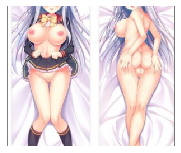

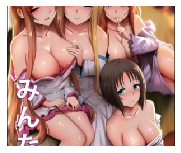

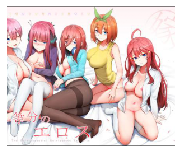

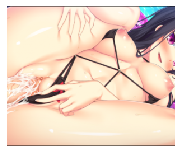

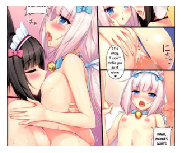

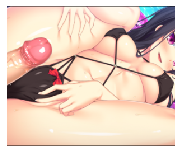

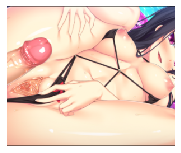

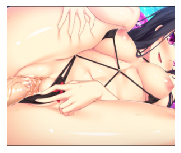

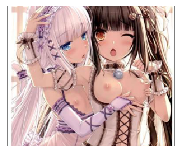

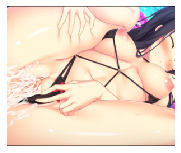

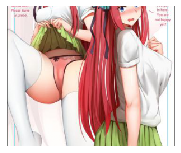

In [50]:
idxs
showing=0
end_at = 10
print("Images that have higher loss(From the highest).")
print("It means the images that the model feel confused on.")
while(showing<=end_at):
  show_image(ds[idxs[showing]][0])
  showing+=1

Make sure you're running this notebook in Jupyter Notebook, not Jupyter Lab. That is accessible via [/tree](/tree), not [/lab](/lab). Running the `ImageCleaner` widget in Jupyter Lab is [not currently supported](https://github.com/fastai/fastai/issues/1539).

In [0]:
# Don't run this in google colab or any other instances running jupyter lab.
# If you do run this on Jupyter Lab, you need to restart your runtime and
# runtime state including all local variables will be lost.
# ImageCleaner(ds, idxs, path)


If the code above does not show any GUI(contains images and buttons) rendered by widgets but only text output, that may caused by the configuration problem of ipywidgets. Try the solution in this [link](https://github.com/fastai/fastai/issues/1539#issuecomment-505999861) to solve it.


Flag photos for deletion by clicking 'Delete'. Then click 'Next Batch' to delete flagged photos and keep the rest in that row. `ImageCleaner` will show you a new row of images until there are no more to show. In this case, the widget will show you images until there are none left from `top_losses.ImageCleaner(ds, idxs)`

You can also find duplicates in your dataset and delete them! To do this, you need to run `.from_similars` to get the potential duplicates' ids and then run `ImageCleaner` with `duplicates=True`. The API works in a similar way as with misclassified images: just choose the ones you want to delete and click 'Next Batch' until there are no more images left.

Make sure to recreate the databunch and `learn_cln` from the `cleaned.csv` file. Otherwise the file would be overwritten from scratch, losing all the results from cleaning the data from toplosses.

Getting activations...


Computing similarities...


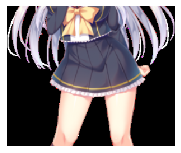

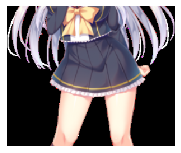

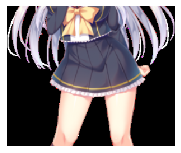

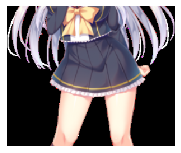

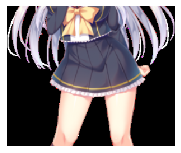

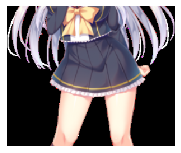

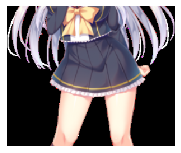

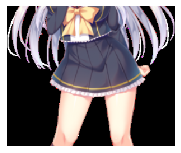

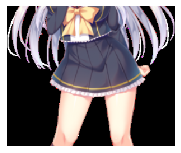

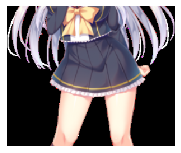

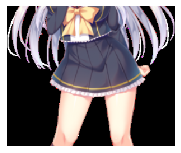

In [51]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)
#this will find the duplicated files
idxs
showing=0
end_at = 10
while(showing<=end_at):
  show_image(ds[idxs[showing]][0])
  showing+=1

In [0]:
#ImageCleaner(ds, idxs, path, duplicates=True)

Remember to recreate your ImageDataBunch from your `cleaned.csv` to include the changes you made in your data!

## Putting your model in production

First thing first, let's export the content of our `Learner` object for production:

In [0]:
learn.export()
!cp "/content/data/happy_sugar_life/export.pkl" "/content/drive/My Drive/Happy Sugar Life/nude.pkl"

This will create a file named 'export.pkl' in the directory where we were working that contains everything we need to deploy our model (the model, the weights but also some metadata like the classes or the transforms/normalization used).

You probably want to use CPU for inference, except at massive scale (and you almost certainly don't need to train in real-time). If you don't have a GPU that happens automatically. You can test your model on CPU like so:

In [0]:
defaults.device = torch.device('cpu')

In [0]:
img = open_image(path/'/content/data/happy_sugar_life/sato/vlcsnap-2020-02-05-18h14m03s169.png')
img.shape

torch.Size([3, 281, 500])

In [0]:
#img.resize(torch.Size([img.shape[0], 126, 224]))

We create our `Learner` in production enviromnent like this, just make sure that `path` contains the file 'export.pkl' from before.

In [0]:
!cp "/content/drive/My Drive/fastai-v3/data/Trained Happy Sugar Life/export.pkl" "/content/data/happy_sugar_life/export.pkl"

In [0]:
learn_pkl = load_learner(path) #so this function will load the pkl file
model_pkl = learn_pkl.model
model_pkl.eval()


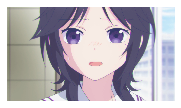

In [0]:
import torchvision.transforms.functional as F
img_it = open_image("/content/data/happy_sugar_life/shouko/vlcsnap-2020-02-05-17h12m33s175.png")
img_it.shape
show_image(img_it)
intput= img_it.data.unsqueeze(0)

In [0]:
print(np.argmax((model_pkl(intput.cuda() )).cpu().detach().numpy()   ))
print(((model_pkl(intput.cuda() )).cpu().detach().numpy()   ))

0
[[ 2.419829 -0.988511 -0.085516 -0.889875]]


In [0]:
learn_pth = learn.load('/content/drive/My Drive/fastai-v3/data/Trained Happy Sugar Life/stage-2').model;
learn_pth.eval()


In [0]:
print(np.argmax((learn_pth(intput.cuda() )).cpu().detach().numpy()   ))
print(((learn_pth(intput.cuda() )).cpu().detach().numpy()   ))

0
[[ 2.419829 -0.988511 -0.085516 -0.889875]]


In [0]:
pred_class,pred_idx,outputs = learn_pkl.predict(img_it)
print(pred_class)
print(pred_idx)
print(outputs)

shouko
tensor(3)
tensor([2.0889e-05, 3.8629e-11, 2.9075e-07, 9.9998e-01])


In [0]:
pred_class,pred_idx,outputs = learn.predict(img_it)
print(pred_class)
print(pred_idx)
print(outputs)

shouko
tensor(3)
tensor([2.0889e-05, 3.8629e-11, 2.9075e-07, 9.9998e-01])


In [0]:
learn.predict(open_image("/content/download (18).png"))

(Category shio,
 tensor(4),
 tensor([7.4447e-05, 3.2644e-08, 5.1317e-06, 7.9781e-14, 9.9986e-01, 5.7354e-05,
         4.5827e-08, 5.5130e-08, 9.5366e-08, 1.4345e-06]))

So you might create a route something like this ([thanks](https://github.com/simonw/cougar-or-not) to Simon Willison for the structure of this code):

```python
@app.route("/classify-url", methods=["GET"])
async def classify_url(request):
    bytes = await get_bytes(request.query_params["url"])
    img = open_image(BytesIO(bytes))
    _,_,losses = learner.predict(img)
    return JSONResponse({
        "predictions": sorted(
            zip(cat_learner.data.classes, map(float, losses)),
            key=lambda p: p[1],
            reverse=True
        )
    })
```

(This example is for the [Starlette](https://www.starlette.io/) web app toolkit.)

## Things that can go wrong

- Most of the time things will train fine with the defaults
- There's not much you really need to tune (despite what you've heard!)
- Most likely are
  - Learning rate
  - Number of epochs

### Learning rate (LR) too high

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.fit_one_cycle(1, max_lr=0.5)

epoch,train_loss,valid_loss,error_rate,time
0,2.002434,9085017.000000,0.782609,00:02


### Learning rate (LR) too low

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Previously we had this result:

```
Total time: 00:57
epoch  train_loss  valid_loss  error_rate
1      1.030236    0.179226    0.028369    (00:14)
2      0.561508    0.055464    0.014184    (00:13)
3      0.396103    0.053801    0.014184    (00:13)
4      0.316883    0.050197    0.021277    (00:15)
```

In [0]:
learn.fit_one_cycle(5, max_lr=1e-9)

epoch,train_loss,valid_loss,error_rate,time
0,1.820173,1.681390,0.391304,00:02
1,1.729933,1.503223,0.347826,00:02
2,1.721467,1.627320,0.260870,00:02
3,1.596017,1.766101,0.369565,00:02
4,1.606956,2.113033,0.347826,00:02


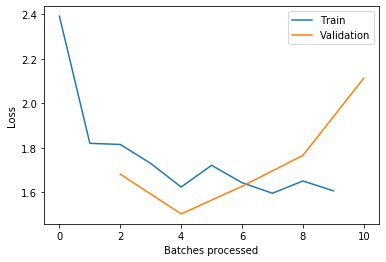

In [0]:
learn.recorder.plot_losses()
#because the lr rate is 🐌, ,

As well as taking a really long time, it's getting too many looks at each image, so may overfit.

### Too few epochs

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate, pretrained=False)

In [0]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.762493,26.919785,0.434783,00:02


### Too many epochs

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.9, bs=32, 
        ds_tfms=get_transforms(do_flip=False, max_rotate=0, max_zoom=1, max_lighting=0, max_warp=0
                              ),size=224, num_workers=4).normalize(imagenet_stats)

You can deactivate this warning by passing `no_check=True`.


/usr/local/lib/python3.6/dist-packages/fastai/basic_data.py:248: UserWarning: Your training dataloader is empty, you have only 23 items in your training set.
                 Your batch size is 32, you should lower it.
  Your batch size is {self.train_dl.batch_size}, you should lower it.""")


In [69]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate, ps=0, wd=0)
learn.unfreeze()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [70]:
learn.fit_one_cycle(2, slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.274604,0.904751,0.416667,00:15
1,0.944804,0.627145,0.250000,00:14


In [80]:
# learn_e = load_learner(Path("/content/drive/My Drive/Happy Sugar Life"))
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (724 items)
x: ImageList
Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244)
y: CategoryList
N,N,N,N,N
Path: data/happy_sugar_life;

Valid: LabelList (180 items)
x: ImageList
Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244)
y: CategoryList
N,N,half-N,N,half-N
Path: data/happy_sugar_life;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=

In [0]:
img_in = open_image("/content/sato (113).png")

In [0]:
img_in= open_image("/content/sato (453).png")
x = img_in

class name: N
class_index: 0


fastai.vision.image.Image

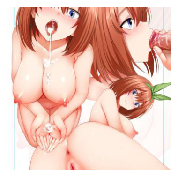

In [100]:
idx=1
x,y = data.valid_ds[idx]
x.show()
print(f'class name: {y}\nclass_index: {y.data}')
type(x)

In [0]:
from fastai.callbacks.hooks import *
m = learn.model.eval();
requires_grad(m, False)

In [0]:

xb,_ = data.one_item(x)    #get tensor from Image x
xb_im = Image(data.denorm(xb)[0])
xb = xb.cuda()

In [0]:
def non_class_discriminative_activations_multi(xb):
    hooks = []
    layer_names = []
    
    hooks.append(hook_output(m[0][3]))
    layer_names.append('first conv')

    for ind in [4,5,6,7]:
        for i,el in enumerate(learn.model[0][ind]):
            hooks.append(hook_output(el))
            layer_names.append(f'layer-{ind-3} - conv-{i+1}')
            #model[0][3] is the first cnn, then [0][4]
    
    preds = m(xb)
    
    for hook in hooks:
        hook.remove()
    
    return hooks,layer_names

In [0]:
hooks,layer_names = non_class_discriminative_activations_multi(xb)

In [87]:
xb.shape

torch.Size([1, 3, 244, 244])

In [88]:
for layer_name,hook in zip(layer_names,hooks):
    print(f'{layer_name}{" "*(18-len(layer_name))} -->   {hook.stored[0].shape}')

first conv         -->   torch.Size([64, 61, 61])
layer-1 - conv-1   -->   torch.Size([64, 61, 61])
layer-1 - conv-2   -->   torch.Size([64, 61, 61])
layer-1 - conv-3   -->   torch.Size([64, 61, 61])
layer-2 - conv-1   -->   torch.Size([128, 31, 31])
layer-2 - conv-2   -->   torch.Size([128, 31, 31])
layer-2 - conv-3   -->   torch.Size([128, 31, 31])
layer-2 - conv-4   -->   torch.Size([128, 31, 31])
layer-3 - conv-1   -->   torch.Size([256, 16, 16])
layer-3 - conv-2   -->   torch.Size([256, 16, 16])
layer-3 - conv-3   -->   torch.Size([256, 16, 16])
layer-3 - conv-4   -->   torch.Size([256, 16, 16])
layer-3 - conv-5   -->   torch.Size([256, 16, 16])
layer-3 - conv-6   -->   torch.Size([256, 16, 16])
layer-4 - conv-1   -->   torch.Size([512, 8, 8])
layer-4 - conv-2   -->   torch.Size([512, 8, 8])
layer-4 - conv-3   -->   torch.Size([512, 8, 8])


In [103]:
acts = hooks[1].stored[0].cpu()
acts.shape

torch.Size([64, 61, 61])

In [104]:
avg_acts = acts.mean(0)
avg_acts.shape

torch.Size([61, 61])

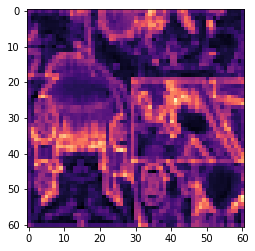

In [92]:
plt.imshow(avg_acts, cmap='magma');

In [0]:
from math import ceil

In [0]:
def plot_forward_activations_multi(hooks):
    
    num_cols = 4
    num_rows = ceil(len(hooks)/num_cols)

    fig,ax = plt.subplots(num_rows,num_cols)
    fig.set_size_inches(num_cols*3,num_rows*3)

    ind = 0
    
    for i in range(num_rows):
        for j in range(num_cols):
            
            if ind>=len(hooks):
                break
            
            acts  = hooks[ind].stored[0].cpu()
            avg_acts = acts.mean(0)

            ax[i,j].imshow(avg_acts, cmap='magma')
            ind+=1
            
    plt.show()

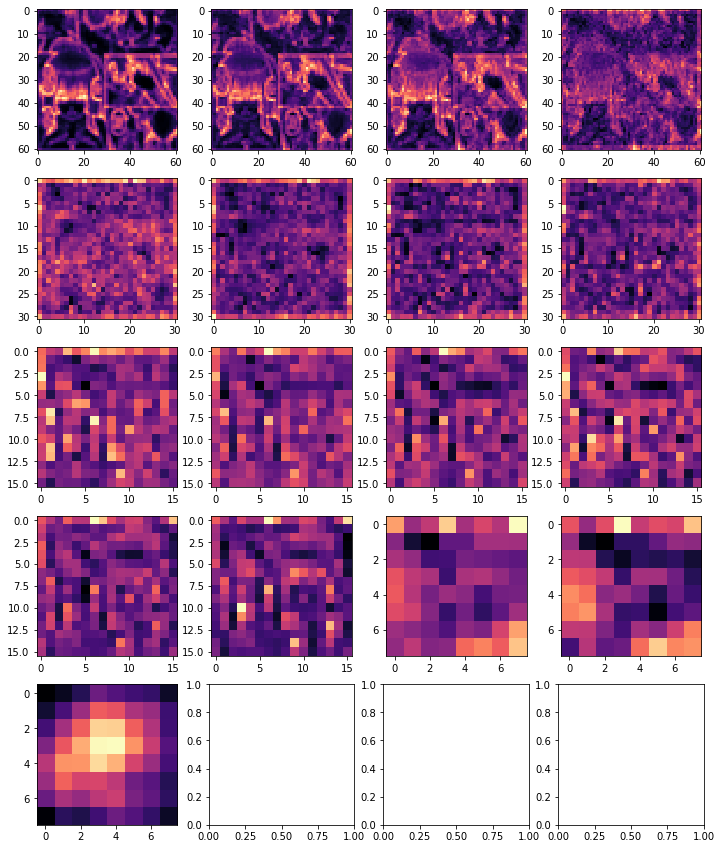

In [105]:
plot_forward_activations_multi(hooks)

In [0]:
def plot_non_class_discriminative_heatmaps_multi(x):
    
    xb,_ = data.one_item(x)
    xb_im = Image(data.denorm(xb)[0])
    xb = xb.cuda()
    
    hooks,_ = non_class_discriminative_activations_multi(xb)
    
    num_cols = 4
    num_rows = ceil(len(hooks)/num_cols)

    fig,ax = plt.subplots(num_rows,num_cols)
    fig.set_size_inches(num_cols*3,num_rows*3)

    ind = 0
    
    for i in range(num_rows):
        for j in range(num_cols):
            
            if ind>=len(hooks):
                break
            
            acts  = hooks[ind].stored[0].cpu()
            avg_acts = acts.mean(0)

            xb_im.show(ax[i,j])
            ax[i,j].imshow(avg_acts, alpha=0.6, extent=(0,350,350,0),
                      interpolation='bilinear', cmap='magma');
            ind+=1
            
    plt.show()

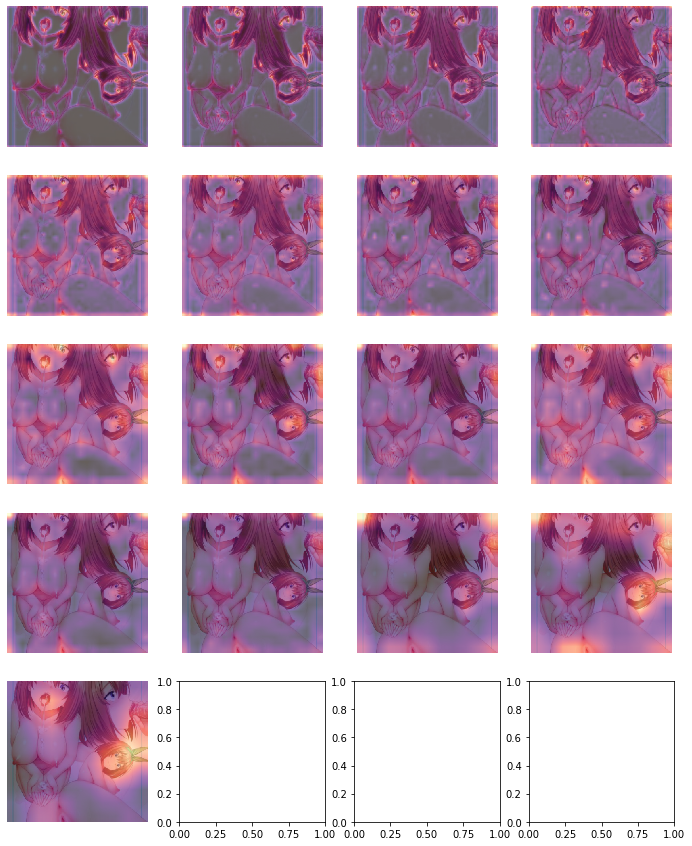

In [106]:
plot_non_class_discriminative_heatmaps_multi(x)